# Problem Set: Scaling & Linear Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Data Preprocessing
<b style="color:#7D3C98">1. Load the Excel dataset into a pandas DataFrame. Handle any missing values and perform data
exploration to understand the characteristics of the dataset.</b>

In [3]:
real_estate_trial = pd.read_csv('Real estate.csv')
real_estate_trial.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
real_estate = pd.read_csv('Real estate.csv', usecols=list(range(1,8)))
real_estate.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [6]:
real_estate.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
real_estate.isna().any()

X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

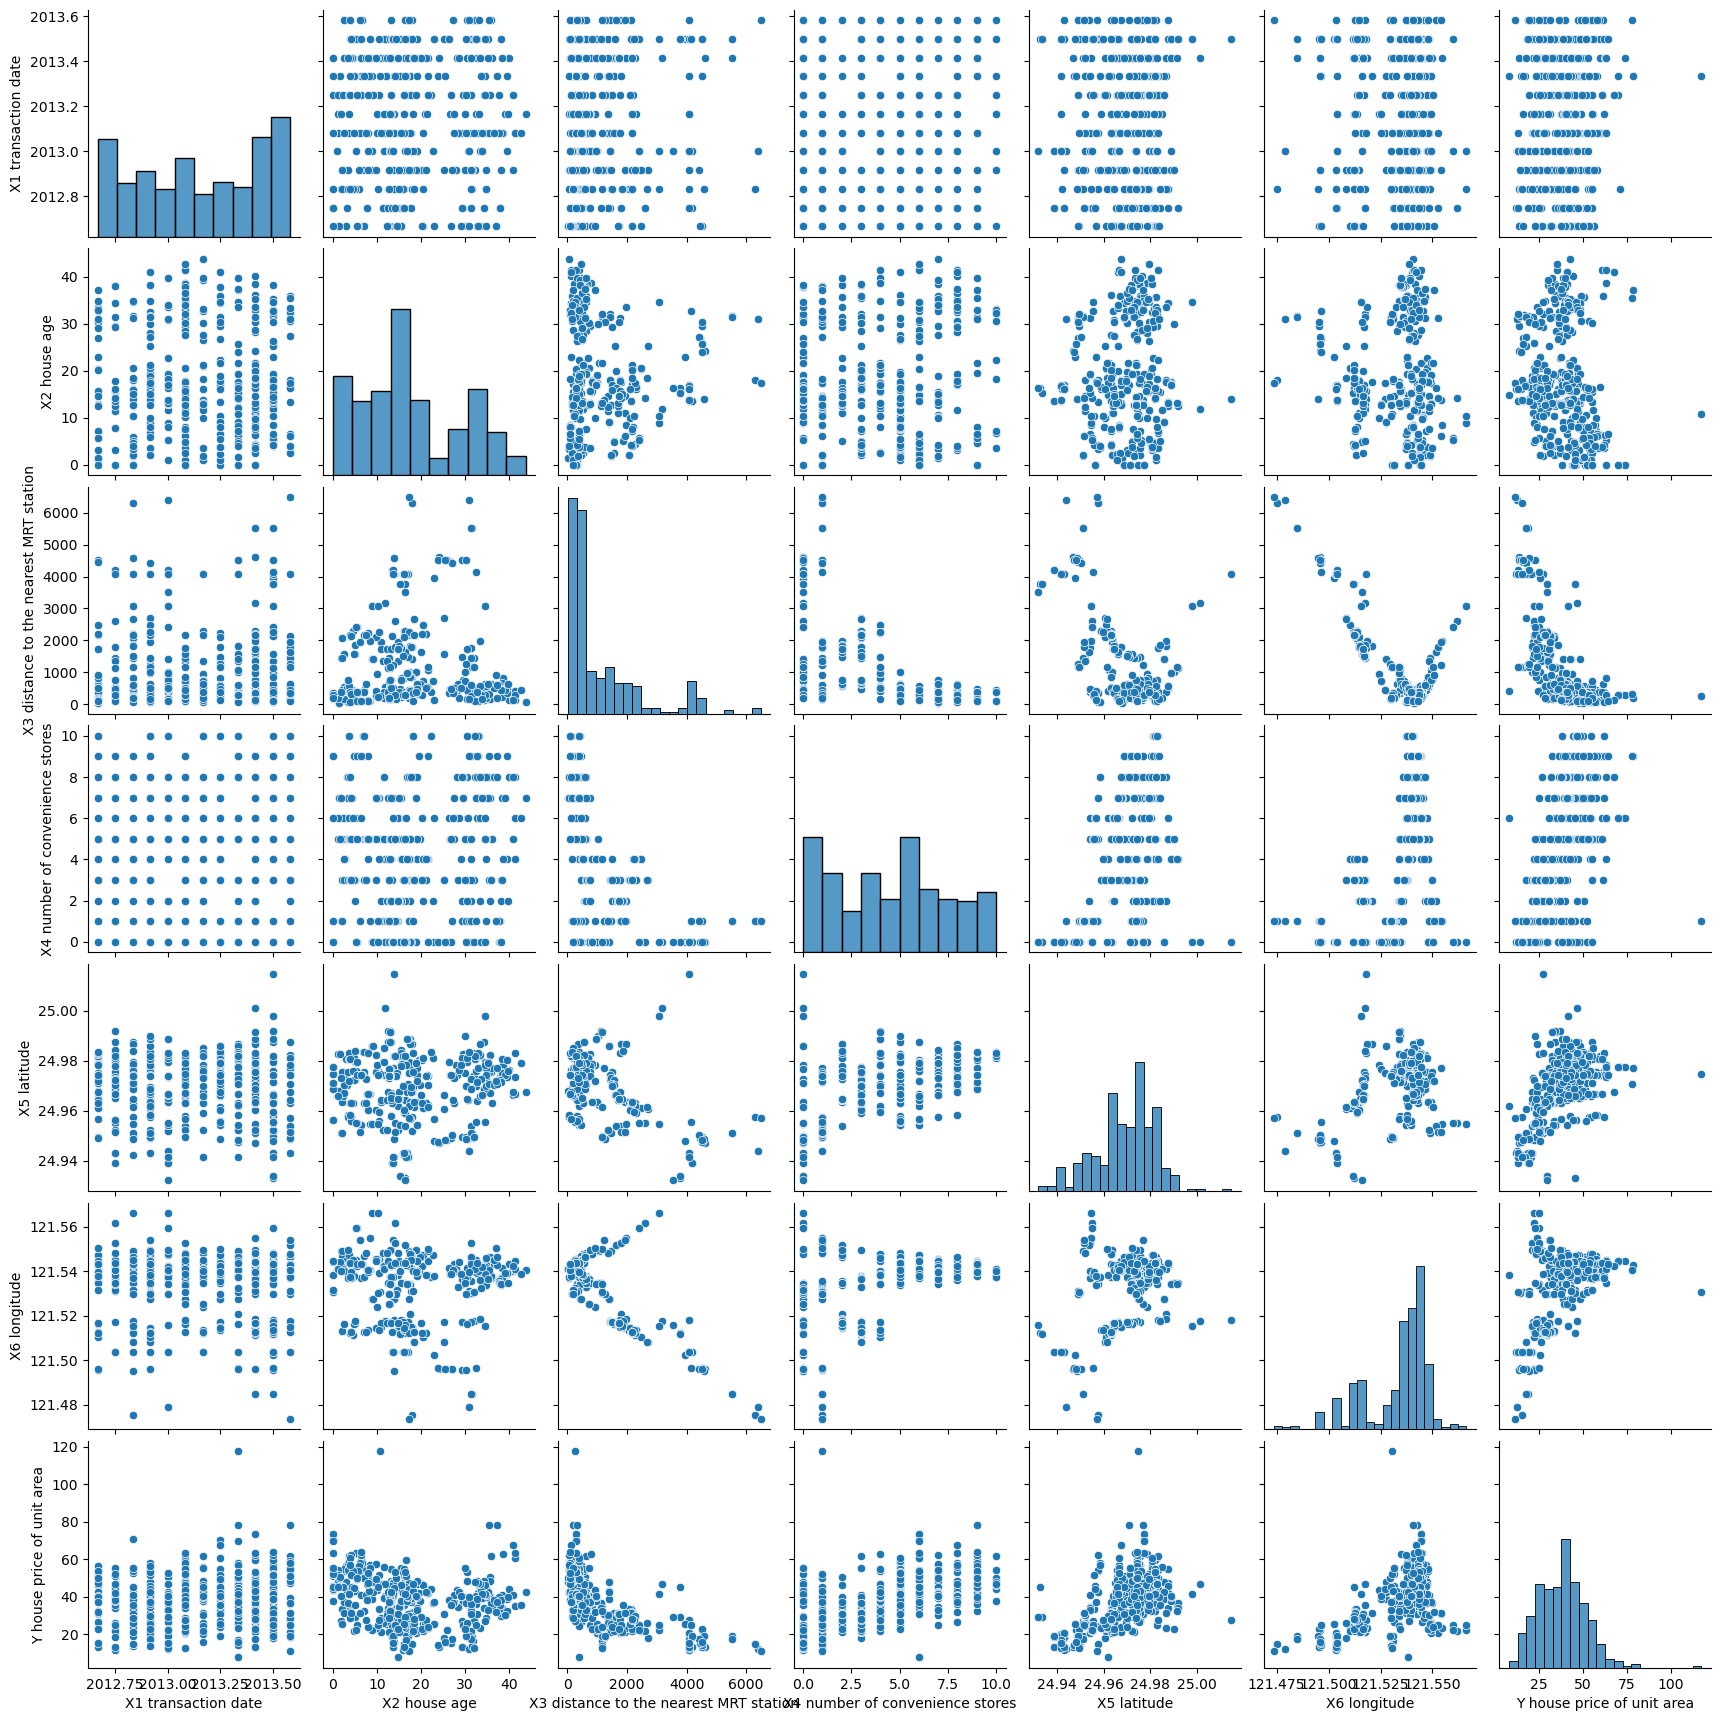

In [8]:
sns.pairplot(real_estate)

---

<b style="color:#7D3C98">2. Extract the feature columns (X1 to X6) and the target column (Y). Split the dataset into features (X) and
target (y). (70% training & 30% testing ratio).</b>

In [9]:
X = real_estate.drop('Y house price of unit area', axis=1)
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [10]:
y = real_estate['Y house price of unit area']
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

---

<b style="color:#7D3C98">3. Standardize the feature columns (X1 to X6) using Z-score scaling. Implement the scaling process
manually (without using libraries like `scikit-learn`).</b>

In [13]:
def standardizer(column):
    return (column - column.mean()) / column.std()

In [14]:
standardizer(real_estate['X2 house age'])

0      1.254111
1      0.156896
2     -0.387322
3     -0.387322
4     -1.115873
         ...   
409   -0.352211
410   -1.063206
411    0.095452
412   -0.843763
413   -0.984207
Name: X2 house age, Length: 414, dtype: float64

In [15]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [16]:
a = {}
a["ding"] = 'dong'
a

{'ding': 'dong'}

In [17]:
scales = {}
for column in X_train_copy.columns:
    column_mean = X_train_copy[column].mean()
    column_std = X_train_copy[column].std()
    scales[column] = dict(mean = column_mean, std = column_std)
scales

{'X1 transaction date': {'mean': 2013.1640865051902,
  'std': 0.2828559264533126},
 'X2 house age': {'mean': 17.44948096885813, 'std': 11.40289352017501},
 'X3 distance to the nearest MRT station': {'mean': 1065.9377607266435,
  'std': 1248.4680161997057},
 'X4 number of convenience stores': {'mean': 4.176470588235294,
  'std': 2.9884035128401853},
 'X5 latitude': {'mean': 24.969585951557093, 'std': 0.012524116924308843},
 'X6 longitude': {'mean': 121.53350916955017, 'std': 0.015106394824237162}}

In [18]:
for column in X_train_copy.columns:
    X_train_copy[column] = standardizer(X_train_copy[column])

X_train_copy.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
7,0.894142,0.249982,-0.623432,0.610202,0.865055,0.580604
194,1.187578,-0.197273,2.167422,-1.397559,-2.870937,-1.451648
19,-1.757384,-1.398722,-0.835067,0.944829,-0.148989,0.497195
176,-1.170513,-0.311279,2.809717,-1.397559,-1.670054,-2.544563
367,-1.170513,-0.214812,0.610653,-0.728305,-0.394914,-1.204733


In [19]:
scales["X1 transaction date"]["std"]

0.2828559264533126

In [20]:
X_test_copy.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
358,2013.167,1.1,193.5845,6,24.96571,121.54089
350,2013.000,13.2,492.2313,5,24.96515,121.53737
373,2013.083,0.0,274.0144,1,24.97480,121.53059
399,2012.917,12.7,170.1289,1,24.97371,121.52984
369,2012.667,20.2,2185.1280,3,24.96322,121.51237


In [21]:
for column in X_test_copy.columns:
    X_test_copy[column] = (X_test_copy[column] - scales[column]["mean"]) / scales[column]["std"]

In [22]:
X_test_copy.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
358,0.010300,-1.433801,-0.698739,0.610202,-0.309479,0.488590
350,-0.580106,-0.372667,-0.459528,0.275575,-0.354193,0.255576
373,-0.286671,-1.530268,-0.634316,-1.062932,0.416321,-0.193241
399,-0.873542,-0.416515,-0.717526,-1.062932,0.329289,-0.242888
369,-1.757384,0.241212,0.896451,-0.393679,-0.508295,-1.399352


## Part 2: Linear Regression

<b style="color:#7D3C98">4. Implement a simple linear regression model using the scaled features (X1 to X6) to predict the house
price (Y). You can use gradient descent for optimization. Calculate the regression coefficients (intercept
and slope) and write down the regression equation.</b>

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train_copy, y_train)

LinearRegression()

In [26]:
lr.predict([[0.010300,-1.433801,-0.698739, 0.610202, -0.309479,0.488590]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47.55430197])

In [27]:
y_test

358    45.1
350    42.3
373    52.2
399    37.3
369    22.8
       ... 
268    40.1
148    45.1
16     70.1
66     50.7
341    37.0
Name: Y house price of unit area, Length: 125, dtype: float64

-0.873542	-0.416515	-0.717526	-1.062932	0.329289	-0.242888

In [28]:
lr.predict([[-0.873542,-0.416515,-0.717526,-1.062932,0.329289,-0.242888]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40.51684858])

-1.757384	0.241212	0.896451	-0.393679	-0.508295	-1.399352

In [29]:
lr.predict([[-1.757384, 0.241212, 0.896451, -0.393679, -0.508295, -1.399352]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.43467626])

In [30]:
lr.coef_

array([ 1.65408405, -2.76572408, -6.41554481,  3.21102552,  2.99447815,
       -0.78908494])

In [31]:
lr.intercept_

38.44186851211001

## <b style="color:red">linear regression needs to be optimized by gradient decent</b> 💥💥💥💥💥💥💥💥💥💥

-1.757384, 0.241212, 0.896451, -0.393679, -0.508295, -1.399352
### Regression equation 😵
y = m1x1 + m2x2 + m3x3 + m4x4 + m5x5 + m6x6 + c

In [32]:
sum(lr.coef_*[-1.757384, 0.241212, 0.896451, -0.393679, -0.508295, -1.399352]) + lr.intercept_

27.43467626083533

In [33]:
sum(lr.coef_*[-0.873542,-0.416515,-0.717526,-1.062932,0.329289,-0.242888]) + lr.intercept_

40.51684858438366

<b style="color:#7D3C98">5. Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared.
          Interpret the R-squared value in the context of this regression.</b>

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
y_pred = lr.predict(X_test_copy)
y_pred

array([47.55430212, 41.08372744, 44.25551663, 40.51685112, 27.43467608,
       45.85435624, 44.70296876, 46.57752144, 23.86072119, 54.35199522,
       34.63011363, 36.34958785, 37.34518438, 23.49428018, 36.02735916,
       34.56828629, 44.01823263, 45.04246804, 29.9554971 , 43.96338099,
        0.09450675, 35.291724  , 48.09455663, 45.54503941, 10.6006418 ,
       39.9786752 , 11.9116313 , 42.79356737, 35.67204264, 38.09573519,
       12.98819108, 40.13164278, 35.44632378, 27.09263458, 46.57230583,
       32.08134705, 50.62714445, 13.2533591 , 49.8007962 , 40.83574406,
       39.02898306, 40.92260381, 47.61743515, 37.68719274, 39.67028734,
       46.64468542, 43.57375428, 19.40851794, 46.95629589, 45.93056809,
       48.03966928, 48.79469044, 43.06419598, 43.00021216, 36.56049741,
       14.20568662, 37.31495695, 34.30916207, 28.33264665, 46.09215428,
       32.92580137, 32.83028385, 14.20568662,  8.3906898 ,  9.79703308,
       34.33939647, 27.76485421, 46.75860125, 33.77722462, 30.85

In [36]:
MSE = mean_squared_error(y_test, y_pred)

In [37]:
MSE

73.56837932850163

In [38]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.5600638168604299

### 🎶 Here `r2_score` is `0.56` which means that 56% of the variance in the outcome variable is explained by the model 🎶

## Part 3: Feature Scaling Comparison

<b style="color:#7D3C98">6. Train another linear regression model without scaling the features. Compare the performance of this
model with the scaled model from Part 2 in terms of convergence speed and prediction accuracy.</b>

In [39]:
X_train_without_scaling = X_train.copy()
X_train_without_scaling

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
7,2013.417,20.3,287.60250,6,24.98042,121.54228
194,2013.500,15.2,3771.89500,0,24.93363,121.51158
19,2012.667,1.5,23.38284,7,24.96772,121.54102
176,2012.833,13.9,4573.77900,0,24.94867,121.49507
367,2012.833,15.0,1828.31900,2,24.96464,121.51531
...,...,...,...,...,...,...
71,2013.083,35.5,640.73910,3,24.97563,121.53715
106,2013.083,17.2,189.51810,8,24.97707,121.54308
270,2013.333,10.8,252.58220,1,24.97460,121.53046
348,2012.833,4.6,259.66070,6,24.97585,121.54516


In [40]:
X_test_without_scaling = X_test.copy()
X_test_without_scaling

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
358,2013.167,1.1,193.5845,6,24.96571,121.54089
350,2013.000,13.2,492.2313,5,24.96515,121.53737
373,2013.083,0.0,274.0144,1,24.97480,121.53059
399,2012.917,12.7,170.1289,1,24.97371,121.52984
369,2012.667,20.2,2185.1280,3,24.96322,121.51237
...,...,...,...,...,...,...
268,2013.417,17.2,390.5684,5,24.97937,121.54245
148,2013.500,16.4,3780.5900,0,24.93293,121.51203
16,2013.250,0.0,292.9978,6,24.97744,121.54458
66,2013.000,1.0,193.5845,6,24.96571,121.54089


In [41]:
lr_reg = LinearRegression()

In [42]:
lr_reg.fit(X_train_without_scaling, y_train)

LinearRegression()

In [43]:
y_pred_without_scaling = lr_reg.predict(X_test_without_scaling)
y_pred_without_scaling

array([47.55430212, 41.08372744, 44.25551663, 40.51685112, 27.43467608,
       45.85435624, 44.70296876, 46.57752144, 23.86072119, 54.35199522,
       34.63011363, 36.34958785, 37.34518438, 23.49428018, 36.02735916,
       34.56828629, 44.01823263, 45.04246804, 29.9554971 , 43.96338099,
        0.09450675, 35.291724  , 48.09455663, 45.54503941, 10.6006418 ,
       39.9786752 , 11.9116313 , 42.79356737, 35.67204264, 38.09573519,
       12.98819108, 40.13164278, 35.44632378, 27.09263458, 46.57230583,
       32.08134705, 50.62714445, 13.2533591 , 49.8007962 , 40.83574406,
       39.02898306, 40.92260381, 47.61743515, 37.68719274, 39.67028734,
       46.64468542, 43.57375428, 19.40851794, 46.95629589, 45.93056809,
       48.03966928, 48.79469044, 43.06419598, 43.00021216, 36.56049741,
       14.20568662, 37.31495695, 34.30916207, 28.33264665, 46.09215428,
       32.92580137, 32.83028385, 14.20568662,  8.3906898 ,  9.79703308,
       34.33939647, 27.76485421, 46.75860125, 33.77722462, 30.85

In [44]:
MSE_without_scaling = mean_squared_error(y_test, y_pred_without_scaling)
MSE_without_scaling

73.56837932850077

In [45]:
print(f"Mean Squared Error without Scaling is {MSE_without_scaling} and MSE after scaling {MSE}")

Mean Squared Error without Scaling is 73.56837932850077 and MSE after scaling 73.56837932850163


In [46]:
r2_score_without_scaling = r2_score(y_test, y_pred_without_scaling)
r2_score_without_scaling

0.5600638168604352

## Part 4: Visualization and Analysis

<b style="color:#7D3C98">7. Create scatter plots to visualize the relationship between each feature (X1 to X6) and the target
variable (Y). Discuss the patterns you observe in the plots.</b>

In [47]:
real_estate.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


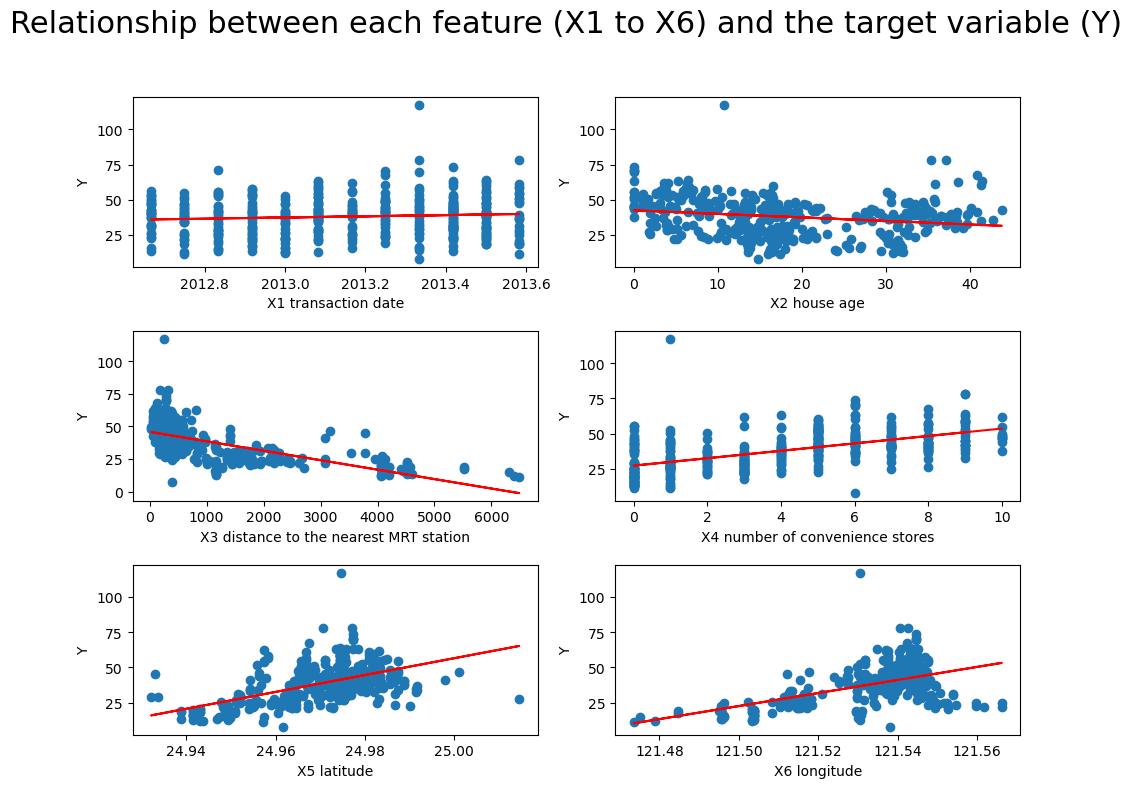

In [48]:
fig, axes = plt.subplots(3,2, figsize=(10, 8))
fig.suptitle("Relationship between each feature (X1 to X6) and the target variable (Y)", fontsize=22)
fig.tight_layout(pad=2.5)

for i in range(3):
    for j in range(2):
        if i == 0 and j == 0:
            axes[i,j].scatter(real_estate['X1 transaction date'], real_estate['Y house price of unit area'])
            m, c = np.polyfit(real_estate['X1 transaction date'],real_estate['Y house price of unit area'],1)
            axes[i,j].plot(real_estate['X1 transaction date'], real_estate['X1 transaction date']*m + c, color='red')
            axes[i,j].set_xlabel('X1 transaction date')
            axes[i,j].set_ylabel('Y')
        elif i == 0 and j == 1:
            axes[i,j].scatter(real_estate['X2 house age'], real_estate['Y house price of unit area'])
            m, c = np.polyfit(real_estate['X2 house age'],real_estate['Y house price of unit area'],1)
            axes[i,j].plot(real_estate['X2 house age'], real_estate['X2 house age']*m + c, color='red')
            axes[i,j].set_xlabel('X2 house age')
            axes[i,j].set_ylabel('Y')
        elif i == 1 and j == 0:
            axes[i,j].scatter(real_estate['X3 distance to the nearest MRT station'], real_estate['Y house price of unit area'])
            m, c = np.polyfit(real_estate['X3 distance to the nearest MRT station'],real_estate['Y house price of unit area'],1)
            axes[i,j].plot(real_estate['X3 distance to the nearest MRT station'], real_estate['X3 distance to the nearest MRT station']*m + c, color='red')
            axes[i,j].set_xlabel('X3 distance to the nearest MRT station')
            axes[i,j].set_ylabel('Y')
        elif i == 1 and j == 1:
            axes[i,j].scatter(real_estate['X4 number of convenience stores'], real_estate['Y house price of unit area'])
            m, c = np.polyfit(real_estate['X4 number of convenience stores'],real_estate['Y house price of unit area'],1)
            axes[i,j].plot(real_estate['X4 number of convenience stores'], real_estate['X4 number of convenience stores']*m + c, color='red')
            axes[i,j].set_xlabel('X4 number of convenience stores')
            axes[i,j].set_ylabel('Y')
        elif i == 2 and j == 0:
            axes[i,j].scatter(real_estate['X5 latitude'], real_estate['Y house price of unit area'])
            m, c = np.polyfit(real_estate['X5 latitude'],real_estate['Y house price of unit area'],1)
            axes[i,j].plot(real_estate['X5 latitude'], real_estate['X5 latitude']*m + c, color='red')
            axes[i,j].set_xlabel('X5 latitude')
            axes[i,j].set_ylabel('Y')
        elif i == 2 and j == 1:
            axes[i,j].scatter(real_estate['X6 longitude'], real_estate['Y house price of unit area'])
            m, c = np.polyfit(real_estate['X6 longitude'],real_estate['Y house price of unit area'],1)
            axes[i,j].plot(real_estate['X6 longitude'], real_estate['X6 longitude']*m + c, color='red')
            axes[i,j].set_xlabel('X6 longitude')
            axes[i,j].set_ylabel('Y')            

Discussion on the patterns of the scatterplot shown above:
- <b style="color:red">"X1 transaction date"</b> column is not related at all with the <b style="color:red">'Y house price of unit area"</b>  

- <b style="color:red">"X2 house age"</b> column has a negative relation with the <b style="color:red">"Y house price of unit area"</b> column which is intuitive because as house gets older the price of the house decreases.  

- <b style="color:red">"X3 distance to the nearest MRT station"</b> column has a negative relation with the "Y house price of unit area" column. The nearer the house is to MRT station more the house price is.  

- <b style="color:red">"X4 number of convenience stores"</b> column has a positive relation with the "Price" column. As the number of convenience stores increase the house price also increases.  

- <b style="color:red">"X5 latitude"</b> column shows a positive relationship with the "Price" column. This tells us that the higher the latitude, higher is the price of the house.  

- <b style="color:red">"X6 longitude"</b> column shows a positive relationship with the "Price" column. This tells us that the higher the longitude, higher is the price of the house.

<b style="color: #2F8C7A">8. Visualize the predicted house prices from the scaled model against the actual house prices. Interpret
the results and discuss any discrepancies.</b>

### Scatter Plot

Text(0.5, 1.0, 'Actual Value vs Predicted Value')

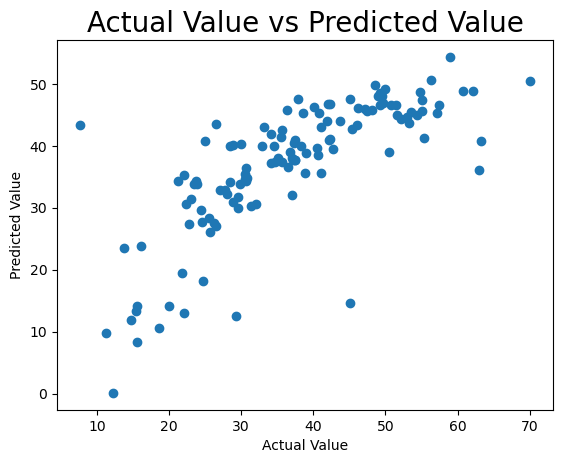

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual Value vs Predicted Value", fontsize=20)

### Scatter Plot

Each data point represents an actual value are on the x-axis and coreresponding predicted value are on the y-axis. This tells us how well the predictions match actual vlaues.
- <b>As we can see from the plot above the predicted values and the actual values when ploted do not form a diagonal shape or close to diagonal shape. So we can assume the model needs fine tuning and feature selection because the model hasn't been able to capture the underlying function properly.</b>

## Part 5: Advanced Problem (Optional)

<b style="color:#7D3C98">9. Implement Min-Max scaling for the feature columns (X1 to X6) manually (without using libraries).
Train a linear regression model using the Min-Max scaled features and compare its performance with the
Z-score scaled and unscaled models.</b>

In [50]:
X_train_min_max = X_train.copy()
X_test_min_max = X_test.copy()

In [51]:
X_train_min_max.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
7,2013.417,20.3,287.60250,6,24.98042,121.54228
194,2013.500,15.2,3771.89500,0,24.93363,121.51158
19,2012.667,1.5,23.38284,7,24.96772,121.54102
176,2012.833,13.9,4573.77900,0,24.94867,121.49507
367,2012.833,15.0,1828.31900,2,24.96464,121.51531


In [52]:
X_train_min_max["X2 house age"]

7      20.3
194    15.2
19      1.5
176    13.9
367    15.0
       ... 
71     35.5
106    17.2
270    10.8
348     4.6
102     1.1
Name: X2 house age, Length: 289, dtype: float64

In [53]:
scales_minmax = {}
for column in X_train_min_max.columns:
    column_min = X_train_min_max[column].min()
    column_max = X_train_min_max[column].max()
    scales_minmax[column] = dict(minimum = column_min, maximum = column_max)
scales_minmax

{'X1 transaction date': {'minimum': 2012.667, 'maximum': 2013.583},
 'X2 house age': {'minimum': 0.0, 'maximum': 42.7},
 'X3 distance to the nearest MRT station': {'minimum': 23.38284,
  'maximum': 6306.153},
 'X4 number of convenience stores': {'minimum': 0, 'maximum': 10},
 'X5 latitude': {'minimum': 24.93363, 'maximum': 25.01459},
 'X6 longitude': {'minimum': 121.47516, 'maximum': 121.56627}}

In [54]:
def min_max(column_data):
    minimum = column_data.min()
    maximum = column_data.max()
    
    return (column_data - minimum)/ (maximum - minimum)

In [55]:
X_train_min_max['X2 house age'].dtype

dtype('float64')

### Transform training data

In [56]:
for column in X_train_min_max.columns:
    if X_train_min_max[column].dtype != object:
        X_train_min_max[column] = min_max(X_train_min_max[column])
    else:
        continue
        
X_train_min_max.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
7,0.818777,0.475410,0.042055,0.6,0.577940,0.736692
194,0.909389,0.355972,0.596634,0.0,0.000000,0.399737
19,0.000000,0.035129,0.000000,0.7,0.421072,0.722862
176,0.181223,0.325527,0.724266,0.0,0.185771,0.218527
367,0.181223,0.351288,0.287283,0.2,0.383029,0.440676


### Transforming test data

In [57]:
X_test_min_max.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
358,2013.167,1.1,193.5845,6,24.96571,121.54089
350,2013.000,13.2,492.2313,5,24.96515,121.53737
373,2013.083,0.0,274.0144,1,24.97480,121.53059
399,2012.917,12.7,170.1289,1,24.97371,121.52984
369,2012.667,20.2,2185.1280,3,24.96322,121.51237


In [58]:
scales_minmax["X2 house age"]["maximum"]

42.7

In [59]:
for column in X_test_min_max.columns:
    X_test_min_max[column] = (X_test_min_max[column] - scales_minmax[column]["minimum"]) / (scales_minmax[column]["maximum"] - scales_minmax[column]["minimum"])

X_test_min_max.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
358,0.545852,0.025761,0.027090,0.6,0.396245,0.721436
350,0.363537,0.309133,0.074624,0.5,0.389328,0.682801
373,0.454148,0.000000,0.039892,0.1,0.508523,0.608385
399,0.272926,0.297424,0.023357,0.1,0.495059,0.600154
369,0.000000,0.473068,0.344075,0.3,0.365489,0.408407


In [60]:
lr_minmax = LinearRegression()
lr_minmax

LinearRegression()

In [61]:
lr_minmax.fit(X_train_min_max, y_train)

LinearRegression()

In [62]:
y_pred_minmax = lr_minmax.predict(X_test_min_max)
y_pred_minmax

array([47.55430212, 41.08372744, 44.25551663, 40.51685112, 27.43467608,
       45.85435624, 44.70296876, 46.57752144, 23.86072119, 54.35199522,
       34.63011363, 36.34958785, 37.34518438, 23.49428018, 36.02735916,
       34.56828629, 44.01823263, 45.04246804, 29.9554971 , 43.96338099,
        0.09450675, 35.291724  , 48.09455663, 45.54503941, 10.6006418 ,
       39.9786752 , 11.9116313 , 42.79356737, 35.67204264, 38.09573519,
       12.98819108, 40.13164278, 35.44632378, 27.09263458, 46.57230583,
       32.08134705, 50.62714445, 13.2533591 , 49.8007962 , 40.83574406,
       39.02898306, 40.92260381, 47.61743515, 37.68719274, 39.67028734,
       46.64468542, 43.57375428, 19.40851794, 46.95629589, 45.93056809,
       48.03966928, 48.79469044, 43.06419598, 43.00021216, 36.56049741,
       14.20568662, 37.31495695, 34.30916207, 28.33264665, 46.09215428,
       32.92580137, 32.83028385, 14.20568662,  8.3906898 ,  9.79703308,
       34.33939647, 27.76485421, 46.75860125, 33.77722462, 30.85

In [63]:
mse_minmax = mean_squared_error(y_test, y_pred_minmax)
mse_minmax

73.56837932850163

In [64]:
r2_score_minmax = r2_score(y_test, y_pred_minmax)
r2_score_minmax

0.5600638168604299

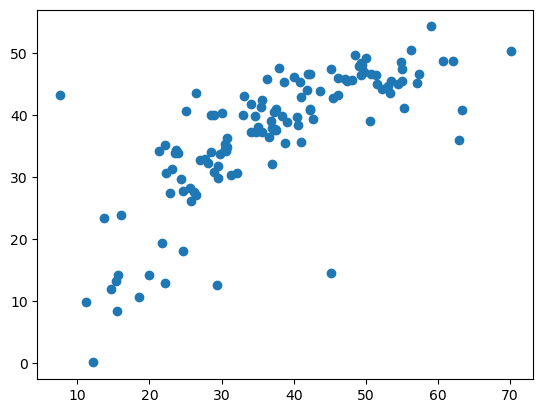

In [65]:
plt.scatter(y_test, y_pred_minmax)

In [66]:
MSE

73.56837932850163

In [67]:
MSE_without_scaling

73.56837932850077

In [68]:
mse_minmax

73.56837932850163

In [69]:
r_squared

0.5600638168604299

In [70]:
r2_score_minmax

0.5600638168604299

In [71]:
r2_score_without_scaling

0.5600638168604352

In [72]:
performance = {
    "standardization" : {
        'mse': MSE,
        'r2_score': r_squared
    },
    
    "normalization" : {
        'mse': mse_minmax,
        'r2_score': r2_score_minmax
    },
    
    "no_feature_transformation" : {
        'mse': MSE_without_scaling,
        'r2_score': r2_score_without_scaling
    }
}

In [73]:
performance_df = pd.DataFrame(performance)
performance_df

,standardization,normalization,no_feature_transformation
mse,73.568379,73.568379,73.568379
r2_score,0.560064,0.560064,0.560064


Text(0, 0.5, 'r2_score')

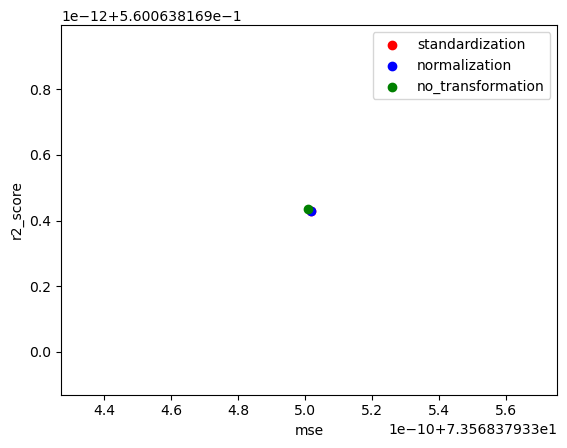

In [80]:
plt.scatter(performance_df.iloc[0, 0], performance_df.iloc[1, 0], color="red", label='standardization')
plt.scatter(performance_df.iloc[0, 1], performance_df.iloc[1, 1], color="blue", label="normalization")
plt.scatter(performance_df.iloc[0, 2], performance_df.iloc[1, 2], color="green", label='no_transformation')
plt.legend()
plt.xlabel("mse")
plt.ylabel("r2_score")